# **Predicting Home Prices in Sri lanka**

## Analyze and Explore DataSet 😃

In [53]:
%%capture
# !pip install wordcloud folium

In [54]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import folium
from folium.plugins import FastMarkerCluster

In [55]:
import os
print(os.getcwd())

E:\Projects\Real Estate Price Prediction\model


In [56]:
#Importing the dataset
df = pd.read_csv("../data/house_prices.csv")
# look the data set
df.head(10)

,Title,Sub_title,Price,Address,Baths,Land size,Beds,House size,Location,Description,Post_URL,Seller_name,Seller_type,published_date,Geo_Address,Lat,Lon
0,House with Land for Sale in Matara for sale,"Posted on 06 Nov 2:32 pm, Matara City, Matara","Rs 5,400,000","Gangodagama Roard,Hakmana,Matara.",1,50.0 perches,3,"1,600.0 sqft","Matara City, Matara","Land for sale with house Matara,Hakmana Gangod...",https://ikman.lk/en/ad/house-with-land-for-sal...,Ishara Dilshan,Member,2021-11-06 14:32:00,"Matara City, Matara, Sri Lanka",80.500000,6.166670
1,à¶ à¶½à·à¶­à· à¶à·à¶¸à¶» 3 à¶ à¶à·à· à...,"Posted on 24 Oct 7:27 am, Athurugiriya, Colombo","Rs 16,800,000",Athurugiriya Galwarusapare,3,8.0 perches,3,"1,480.0 sqft","Athurugiriya, Colombo",*House For Sale In Athurugiriya *Galwarusapare...,https://ikman.lk/en/ad/alut-kaamr-3-k-grh-bhaa...,DILRUWAN REAL ESTATE,Premium-Member,2021-10-24 07:27:00,"Athurugiriya, Colombo, Sri Lanka",79.989929,6.877246
2,Kelaniya - House on 20P Land for sale for sale,"Posted on 17 Nov 5:19 pm, Kelaniya, Gampaha","Rs 20,000,000",Kelaniya- Ranaviru Maldeniya Road,2,20.0 perches,3,"2,800.0 sqft","Kelaniya, Gampaha","Kelaniya- Biyagama road, Ranaviru Maladeniya R...",https://ikman.lk/en/ad/kelaniya-house-on-20p-l...,Provident Paradise (Pvt) Ltd,Member,2021-11-17 17:19:00,"Kelaniya, Gampaha, Sri Lanka",79.914926,6.951178
3,House For Sale in Pamankada Lane Wellawatte Co...,"Posted on 17 Nov 5:07 pm, Colombo 6, Colombo","Rs 187,000,000",Pamankada Lane Wellawatte Colombo.06,5,22.0 perches,5,"4,000.0 sqft","Colombo 6, Colombo",22 Perches House For Sale in Pamankada Lane We...,https://ikman.lk/en/ad/house-for-sale-in-paman...,Colombo Construction Property Developers,Premium-Member,2021-11-17 17:07:00,"Colombo 6, Colombo, Sri Lanka",80.016670,6.866670
4,House For Sale - Attidiya for sale,"Posted on 17 Nov 5:06 pm, Dehiwala, Colombo","Rs 1,300,000",MainRoad Attidiya,1,6.3 perches,2,900.0 sqft,"Dehiwala, Colombo",*à¶ à¶­à·à¶­à·à¶©à·à¶º à¶´à·âà¶»à¶¯à·à·...,https://ikman.lk/en/ad/house-for-sale-attidiya...,Lakdinu Houses,Member,2021-11-17 17:06:00,"Dehiwala, Colombo, Sri Lanka",79.880242,6.838232
5,House For Sale in Batharamulle for sale,"Posted on 17 Nov 5:04 pm, Talawatugoda, Colombo","Rs 55,000,000",NaN,4,11.0 perches,4,"3,300.0 sqft","Talawatugoda, Colombo",House For Sale in Batharamulle HIGHLY RESIDEN...,https://ikman.lk/en/ad/house-for-sale-in-batha...,Lassana Gedara Real Estate,Premium-Member,2021-11-17 17:04:00,"Talawatugoda, Colombo, Sri Lanka",80.016670,6.866670
6,Brand New Luxury House For Sale Kandy Peradeni...,"Posted on 21 Oct 12:47 pm, Kandy City, Kandy","Rs 45,000,000",NaN,4,10.0 perches,4,"4,100.0 sqft","Kandy City, Kandy",Brand New Luxury House For Sale Kandy Peradeni...,https://ikman.lk/en/ad/brand-new-luxury-house-...,Tele Ads,Member,2021-10-21 12:47:00,"Kandy City, Kandy, Sri Lanka",80.625828,7.295044
7,House for Sale in Kesbewa for sale,"Posted on 17 Nov 4:56 pm, Piliyandala, Colombo","Rs 16,700,000","Kudamaduwa Rd,Honnanthra",3,9.0 perches,3,"1,400.0 sqft","Piliyandala, Colombo",ð´ House for Sale in Kesbewa================...,https://ikman.lk/en/ad/house-for-sale-in-kesbe...,Sell fast | Kesbawa Isuru Communication,Member,2021-11-17 16:56:00,"Piliyandala, Colombo, Sri Lanka",79.922703,6.801844
8,Brand New House For Sale InThalwathugoda for sale,"Posted on 17 Nov 4:56 pm, Talawatugoda, Colombo","Rs 50,000,000","Hokandara Road , Thalawathugoda",4,10.0 perches,4,"4,000.0 sqft","Talawatugoda, Colombo",House for sale in Thalawathugoda off Thalawath...,https://ikman.lk/en/ad/brand-new-house-for-sal...,JPR Properties,Premium-Member,2021-11-17 16:56:00,"Talawatugoda, Colombo, Sri Lanka",80.016670,6.866670
9,à¶±à·à·à· à¶à¶©à¶¸à¶à· à·à·à¶à·à¶«à·...,"Posted on 17 Nov 4:47 pm, Kadawatha, Gampaha","Rs 16,000,000",163/126à¶¶à¶à¶à¶½à·à·à¶­à·à¶­ à¶à·à¶»à·...,1,"3,000.0 perches",3,"2,000.0 sqft","Kadawatha, Gampaha",à¶´à¶»à·à¶ à·à· à·à·à·à·à·à·,https://ikman.lk/en/ad/iddmk-nivs-

In [57]:
# looking the shape DataSet
df.shape

(15327, 17)

In [58]:
#Checking the dtypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15327 entries, 0 to 15326
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           15327 non-null  object 
 1   Sub_title       15327 non-null  object 
 2   Price           15327 non-null  object 
 3   Address         11191 non-null  object 
 4   Baths           15327 non-null  object 
 5   Land size       15327 non-null  object 
 6   Beds            15327 non-null  object 
 7   House size      15327 non-null  object 
 8   Location        15327 non-null  object 
 9   Description     15327 non-null  object 
 10  Post_URL        15327 non-null  object 
 11  Seller_name     15327 non-null  object 
 12  Seller_type     15327 non-null  object 
 13  published_date  15327 non-null  object 
 14  Geo_Address     15327 non-null  object 
 15  Lat             15327 non-null  float64
 16  Lon             15327 non-null  float64
dtypes: float64(2), object(15)
memor

In [59]:
#Conversion data type column 
df["published_date"]=pd.to_datetime(df["published_date"])
df['Price']=df['Price'].str.replace(r'\D*',"").astype(float)
df['House size']=df['House size'].str.replace(r'\D*',"").astype(float)
df['Land size']=df['Land size'].str.replace(r'\D*',"").astype(float)
df['Baths']=df['Baths'].str.replace(r'\D*',"").astype(float)
df['Beds']=df['Beds'].str.replace(r'\D*',"").astype(float)

C:\Users\Admin\AppData\Local\Temp\ipykernel_25512\3393166348.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\Admin\AppData\Local\Temp\ipykernel_25512\3393166348.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\Admin\AppData\Local\Temp\ipykernel_25512\3393166348.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\Admin\AppData\Local\Temp\ipykernel_25512\3393166348.py:6: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\Admin\AppData\Local\Temp\ipykernel_25512\3393166348.py:7: FutureWarning:

The default value of regex will change from True to False in a future version.



In [60]:
df["City"] = df["Location"].apply(lambda x: x.split(",")[0])
df["District"] = df["Location"].apply(lambda x: x.split(",")[-1])

In [61]:
#checking null value 
df.isna().sum()

Title                0
Sub_title            0
Price                0
Address           4136
Baths                0
Land size            0
Beds                 0
House size           0
Location             0
Description          0
Post_URL             0
Seller_name          0
Seller_type          0
published_date       0
Geo_Address          0
Lat                  0
Lon                  0
City                 0
District             0
dtype: int64

**note**: address column has some missing values but we don't need it

In [62]:
# look  describe data set
df.describe().round(2)

,Price,Baths,Land size,Beds,House size,Lat,Lon
count,1.532700e+04,15327.00,15327.00,15327.00,15327.00,15327.00,15327.00
mean,3.534340e+07,2.98,215.64,3.99,28313.65,79.98,6.91
std,4.513401e+07,1.36,1073.22,1.25,26066.22,0.18,0.24
min,3.600000e+03,1.00,0.00,1.00,0.00,79.80,5.94
25%,1.650000e+07,2.00,80.00,3.00,16500.00,79.91,6.80
50%,2.600000e+07,3.00,100.00,4.00,25090.00,79.94,6.87
75%,3.950000e+07,4.00,150.00,4.00,33000.00,80.00,6.94
max,1.900000e+09,10.00,54450.00,10.00,1200000.00,81.82,9.67


In [63]:
# how much variation in price, to no of beds 
df.groupby('Beds').agg({'Price':['min', 'max', 'mean']})

Price                            
             min           max          mean
Beds                                        
1.0     700000.0  2.600000e+07  7.927273e+06
2.0      29000.0  1.150000e+08  1.110502e+07
3.0      65000.0  5.256000e+08  1.921094e+07
4.0       3600.0  1.000000e+09  3.591366e+07
5.0     980000.0  1.150000e+09  5.114631e+07
6.0    3000000.0  3.200000e+08  6.069650e+07
7.0    7800000.0  8.250000e+08  6.703941e+07
8.0    6400000.0  1.900000e+09  1.402006e+08
9.0   15000000.0  2.300000e+08  9.561765e+07
10.0  16000000.0  8.000000e+08  6.632211e+07

In [64]:
pd.pivot_table(df, values='Price', index='Beds', aggfunc=[min, max, np.mean])

,min,max,mean
,Price,Price,Price
Beds,,,
1.0,700000.0,2.600000e+07,7.927273e+06
2.0,29000.0,1.150000e+08,1.110502e+07
3.0,65000.0,5.256000e+08,1.921094e+07
4.0,3600.0,1.000000e+09,3.591366e+07
5.0,980000.0,1.150000e+09,5.114631e+07
6.0,3000000.0,3.200000e+08,6.069650e+07
7.0,7800000.0,8.250000e+08,6.703941e+07
8.0,6400000.0,1.900000e+09,1.402006e+08


Text(0.5, 1.0, 'The relation between number of beds and price')

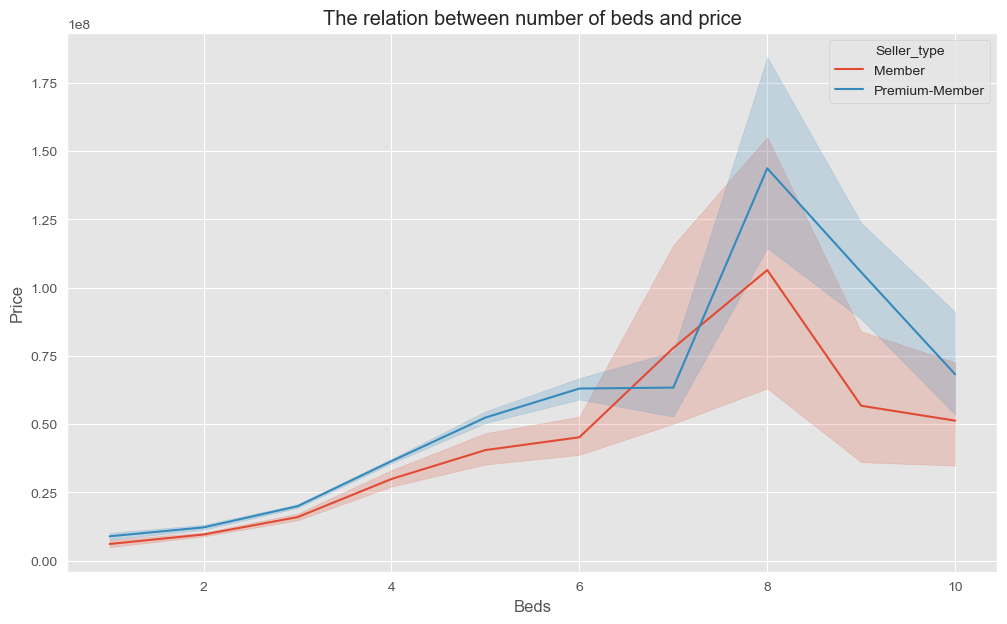

In [65]:
# show the relation between number of beds and price
plt.figure(figsize=(12,7))
sns.lineplot(data=df,x="Beds",y="Price",hue="Seller_type")
plt.title("The relation between number of beds and price")

In [66]:
pd.pivot_table(df, values='Price', index='Baths', aggfunc=[min, max, np.mean])

,min,max,mean
,Price,Price,Price
Baths,,,
1.0,29000.0,2.575000e+08,1.129396e+07
2.0,65000.0,3.250000e+08,2.174165e+07
3.0,3600.0,4.800000e+08,3.452066e+07
4.0,2150000.0,1.150000e+09,4.596151e+07
5.0,1550000.0,3.600000e+08,6.218792e+07
6.0,3000000.0,8.250000e+08,8.538613e+07
7.0,19500000.0,5.750000e+08,9.001585e+07
8.0,12500000.0,1.900000e+09,1.807731e+08


Text(0.5, 1.0, 'The relation between number of baths and price')

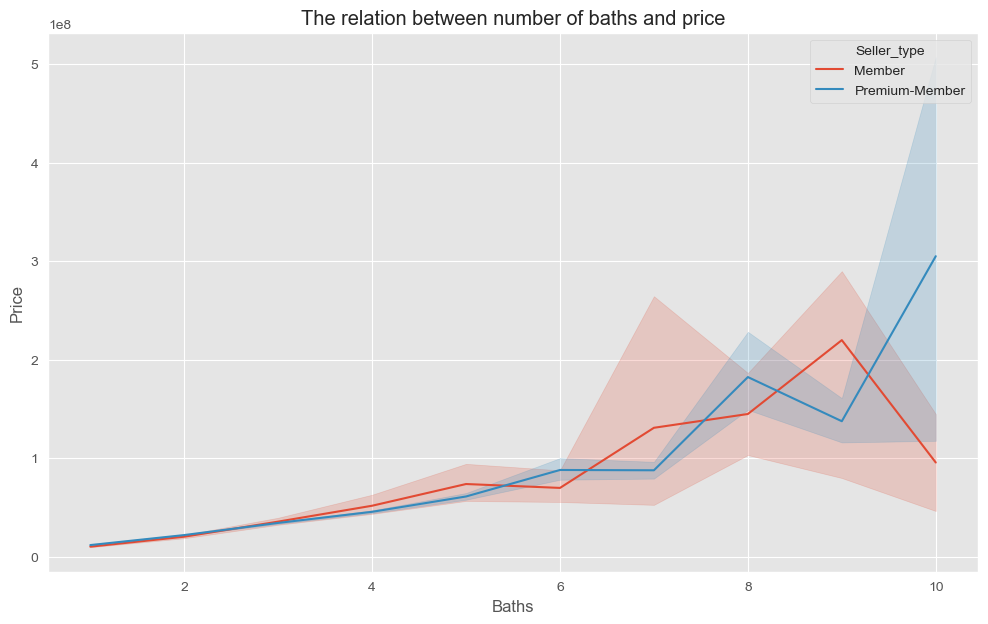

In [67]:
# show the relation between number of baths and price

plt.figure(figsize=(12,7))
sns.lineplot(data=df,x="Baths",y="Price",hue="Seller_type")
plt.title("The relation between number of baths and price")

In [68]:
pd.pivot_table(df, values='Title', index='Location', aggfunc='count').sort_values(by='Title', ascending=False)

,Title
Location,
"Piliyandala, Colombo",2806
"Malabe, Colombo",1590
"Negombo, Gampaha",1363
"Talawatugoda, Colombo",1296
"Kottawa, Colombo",750
...,...
"Galigamuwa, Kegalle",1
"Galgamuwa, Kurunegala",1
"Mullativu City, Mullativu",1


<Axes: xlabel='Location'>

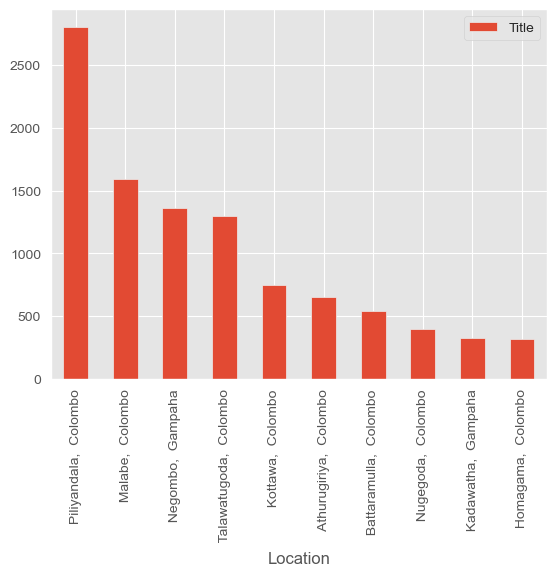

In [69]:
pd.pivot_table(df, values='Title', index='Location', aggfunc='count').sort_values(by='Title', ascending=False).head(10).plot(kind="bar")

In [70]:
pd.pivot_table(df, index=['District', 'City'], values=['Title', 'Price'], aggfunc={'Title': 'count', 'Price': ['min', 'max', np.mean]})

Price                          Title
                                          max          mean        min count
District       City                                                         
  Ampara        Akkarepattu          900000.0  9.000000e+05   900000.0     1
                Ampara City        14000000.0  7.300000e+06  4300000.0     6
                Kalmunai           21000000.0  1.325000e+07  3750000.0     3
  Anuradhapura  Anuradhapura City  45000000.0  1.699688e+07  2500000.0    32
                Eppawala            6000000.0  6.000000e+06  6000000.0     1
...                                       ...           ...        ...   ...
  Ratnapura     Kuruwita           88500000.0  4.875000e+07  9000000.0     2
                Pelmadulla          9500000.0  7.233333e+06  6000000.0     3
                Ratnapura City     85000000.0  2.730000e+07   950000.0    12
  Trincomalee   Trincomalee City    3500000.0  2.833333e+06  2000000.0     3
  Vavuniya      Vavuniya City       5500000.0  5.500000e+06  5500000.0     1

[172 rows x 4 columns]

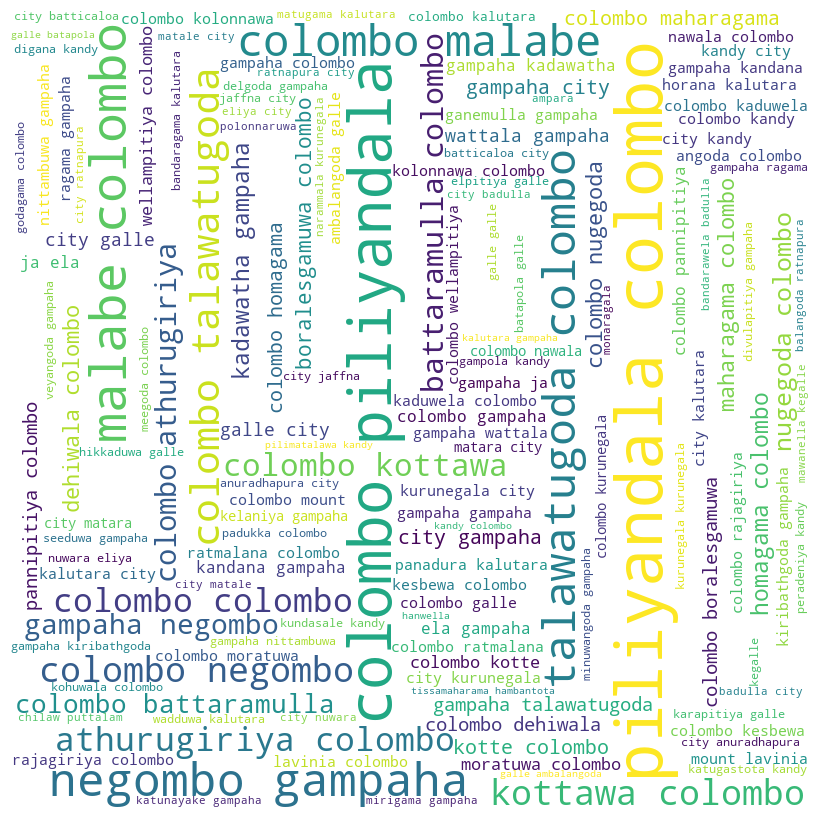

In [71]:
# repeat words location

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.Location:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Text(0.5, 1.0, 'The relation between House size and price')

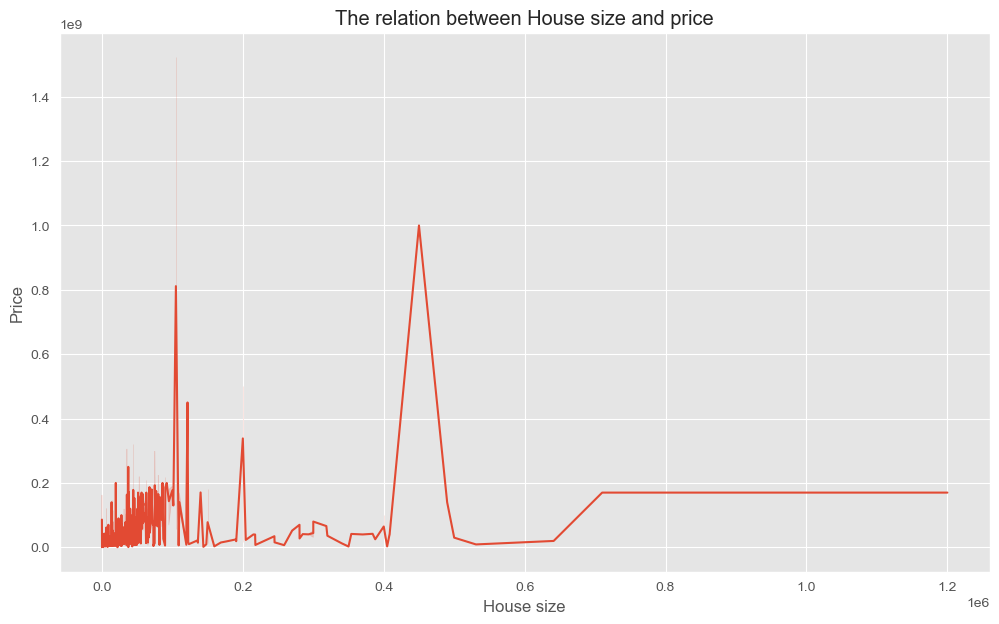

In [72]:
# show the relation between House size and price

plt.figure(figsize=(12,7))

sns.lineplot(data=df,x="House size",y="Price")
plt.title("The relation between House size and price")

In [73]:
#interactve graph

px.scatter_3d(df,x="Price",y="House size",z="Land size",color="Seller_type")

In [74]:
folium_map = folium.Map(location=[7.8731, 80.7718],
                        zoom_start=8,
                        tiles='CartoDB dark_matter')

df_map = df[df['Lat'].notna() & df['Lon'].notna() ]

FastMarkerCluster(data=list(zip(df_map['Lon'].values, df_map['Lat'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map

## **Building a Machine Learning Model - Regression 😃**

In [75]:
!pip install xgboost

In [76]:
#Importing the basic librarires for building model


from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures,minmax_scale,MaxAbsScaler ,LabelEncoder,MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.svm import SVR
from xgboost import XGBRegressor

In [77]:
# change the column Seller type to numeric

df["seller_type"]=pd.get_dummies(df["Seller_type"],drop_first=True)

In [78]:
# change the column Location to numeric using label Encoder

LE=LabelEncoder()
LE.fit(df["Location"])
df["Location"]=LE.transform(df["Location"])

In [79]:
list(LE.classes_)

[' Ahangama,  Galle',
 ' Akkarepattu,  Ampara',
 ' Akuressa,  Matara',
 ' Alawwa,  Kurunegala',
 ' Alutgama,  Kalutara',
 ' Ambalangoda,  Galle',
 ' Ambalantota,  Hambantota',
 ' Ampara City,  Ampara',
 ' Ampitiya,  Kandy',
 ' Angoda,  Colombo',
 ' Anuradhapura City,  Anuradhapura',
 ' Athurugiriya,  Colombo',
 ' Avissawella,  Colombo',
 ' Baddegama,  Galle',
 ' Badulla City,  Badulla',
 ' Balangoda,  Ratnapura',
 ' Bandaragama,  Kalutara',
 ' Bandarawela,  Badulla',
 ' Batapola,  Galle',
 ' Battaramulla,  Colombo',
 ' Batticaloa City,  Batticaloa',
 ' Beliatta,  Hambantota',
 ' Beruwala,  Kalutara',
 ' Bibile,  Monaragala',
 ' Boralesgamuwa,  Colombo',
 ' Buttala,  Monaragala',
 ' Chilaw,  Puttalam',
 ' Colombo 1,  Colombo',
 ' Colombo 10,  Colombo',
 ' Colombo 12,  Colombo',
 ' Colombo 13,  Colombo',
 ' Colombo 14,  Colombo',
 ' Colombo 15,  Colombo',
 ' Colombo 2,  Colombo',
 ' Colombo 3,  Colombo',
 ' Colombo 4,  Colombo',
 ' Colombo 5,  Colombo',
 ' Colombo 6,  Colombo',
 ' Colomb

In [80]:
# separation the data type columns [ object and numeric ]

cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

data=df[num]  # new dataframe just type numeric
data.drop(columns="published_date",inplace=True)
data.head(10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_25512\439906615.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Price,Baths,Land size,Beds,House size,Location,Lat,Lon,seller_type
0,5400000.0,1.0,500.0,3.0,16000.0,111,80.500000,6.166670,0
1,16800000.0,3.0,80.0,3.0,14800.0,11,79.989929,6.877246,1
2,20000000.0,2.0,200.0,3.0,28000.0,94,79.914926,6.951178,0
3,187000000.0,5.0,220.0,5.0,40000.0,37,80.016670,6.866670,1
4,1300000.0,1.0,63.0,2.0,9000.0,44,79.880242,6.838232,0
5,55000000.0,4.0,110.0,4.0,33000.0,154,80.016670,6.866670,1
6,45000000.0,4.0,100.0,4.0,41000.0,87,80.625828,7.295044,0
7,16700000.0,3.0,90.0,3.0,14000.0,143,79.922703,6.801844,0
8,50000000.0,4.0,100.0,4.0,40000.0,154,80.016670,6.866670,1
9,16000000.0,1.0,30000.0,3.0,20000.0,80,79.951267,7.001966,1


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15327 entries, 0 to 15326
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        15327 non-null  float64
 1   Baths        15327 non-null  float64
 2   Land size    15327 non-null  float64
 3   Beds         15327 non-null  float64
 4   House size   15327 non-null  float64
 5   Location     15327 non-null  int32  
 6   Lat          15327 non-null  float64
 7   Lon          15327 non-null  float64
 8   seller_type  15327 non-null  uint8  
dtypes: float64(7), int32(1), uint8(1)
memory usage: 913.2 KB


In [82]:
data.shape

(15327, 9)

In [83]:
data.isnull().sum()

Price          0
Baths          0
Land size      0
Beds           0
House size     0
Location       0
Lat            0
Lon            0
seller_type    0
dtype: int64

In [84]:
#Defined X value and y value , and split the data train
X = data.drop(columns="Price")           
y = data["Price"]   

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (11495, 8)
X Test  :  (3832, 8)
Y Train :  (11495,)
Y Test  :  (3832,)


In [85]:
#Defined object from library Regression 

LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
KNR = KNeighborsRegressor()
MLP = MLPRegressor()
XGB = XGBRegressor()

In [86]:
# make for loop for Regression 

li = [LR,DTR,RFR,KNR,KNR,XGB]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",r2_score(ypred,y_test)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

LinearRegression() : -335.5303382384051
DecisionTreeRegressor() : 50.89808949552105
RandomForestRegressor() : 50.10731854961838
KNeighborsRegressor() : -42.58583724502891
KNeighborsRegressor() : -42.58583724502891
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) : 69.44344258153569


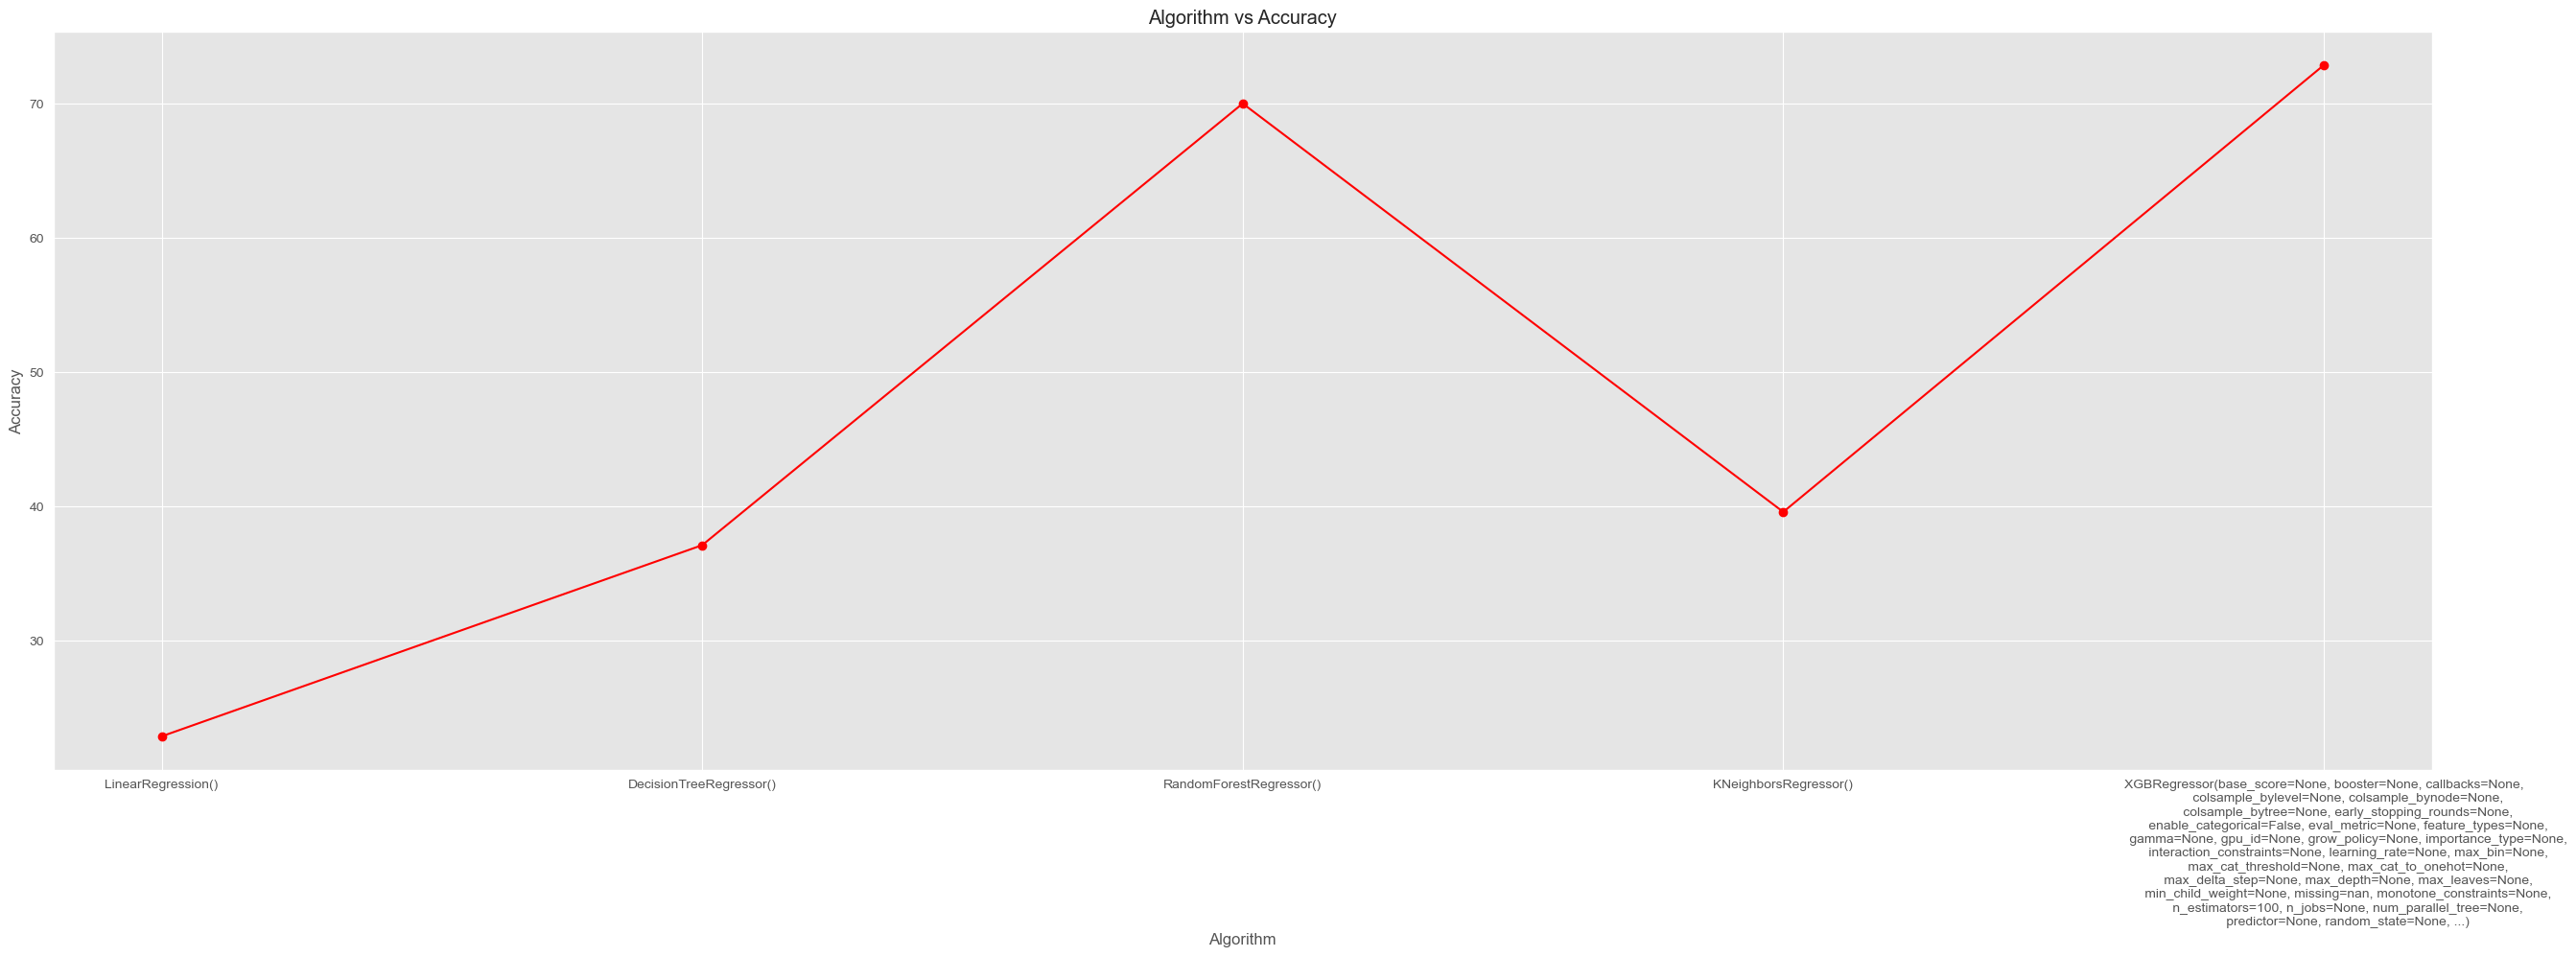

In [87]:
# make graph about Accuracy

plt.figure(figsize=(32, 10))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='red')
plt.show()

## Normalization

In [88]:
# fit scaler on training data
std = StandardScaler().fit(X_train)
# transform train data
x_train_std = std.transform(X_train)
# transform test data
x_test_std = std.transform(X_test)

In [89]:
li = [LR,DTR,RFR,KNR,KNR,XGB]
dis = {}
for i in li:
    i.fit(x_train_std,y_train)
    ypred = i.predict(x_test_std)
    print(i,":",r2_score(ypred,y_test)*100)
    dis.update({str(i):i.score(x_test_std,y_test)*100})

LinearRegression() : -335.5303382384098
DecisionTreeRegressor() : 62.467455799996415
RandomForestRegressor() : 46.576130869342904
KNeighborsRegressor() : -25.229835459746198
KNeighborsRegressor() : -25.229835459746198
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) : 69.4548242674324


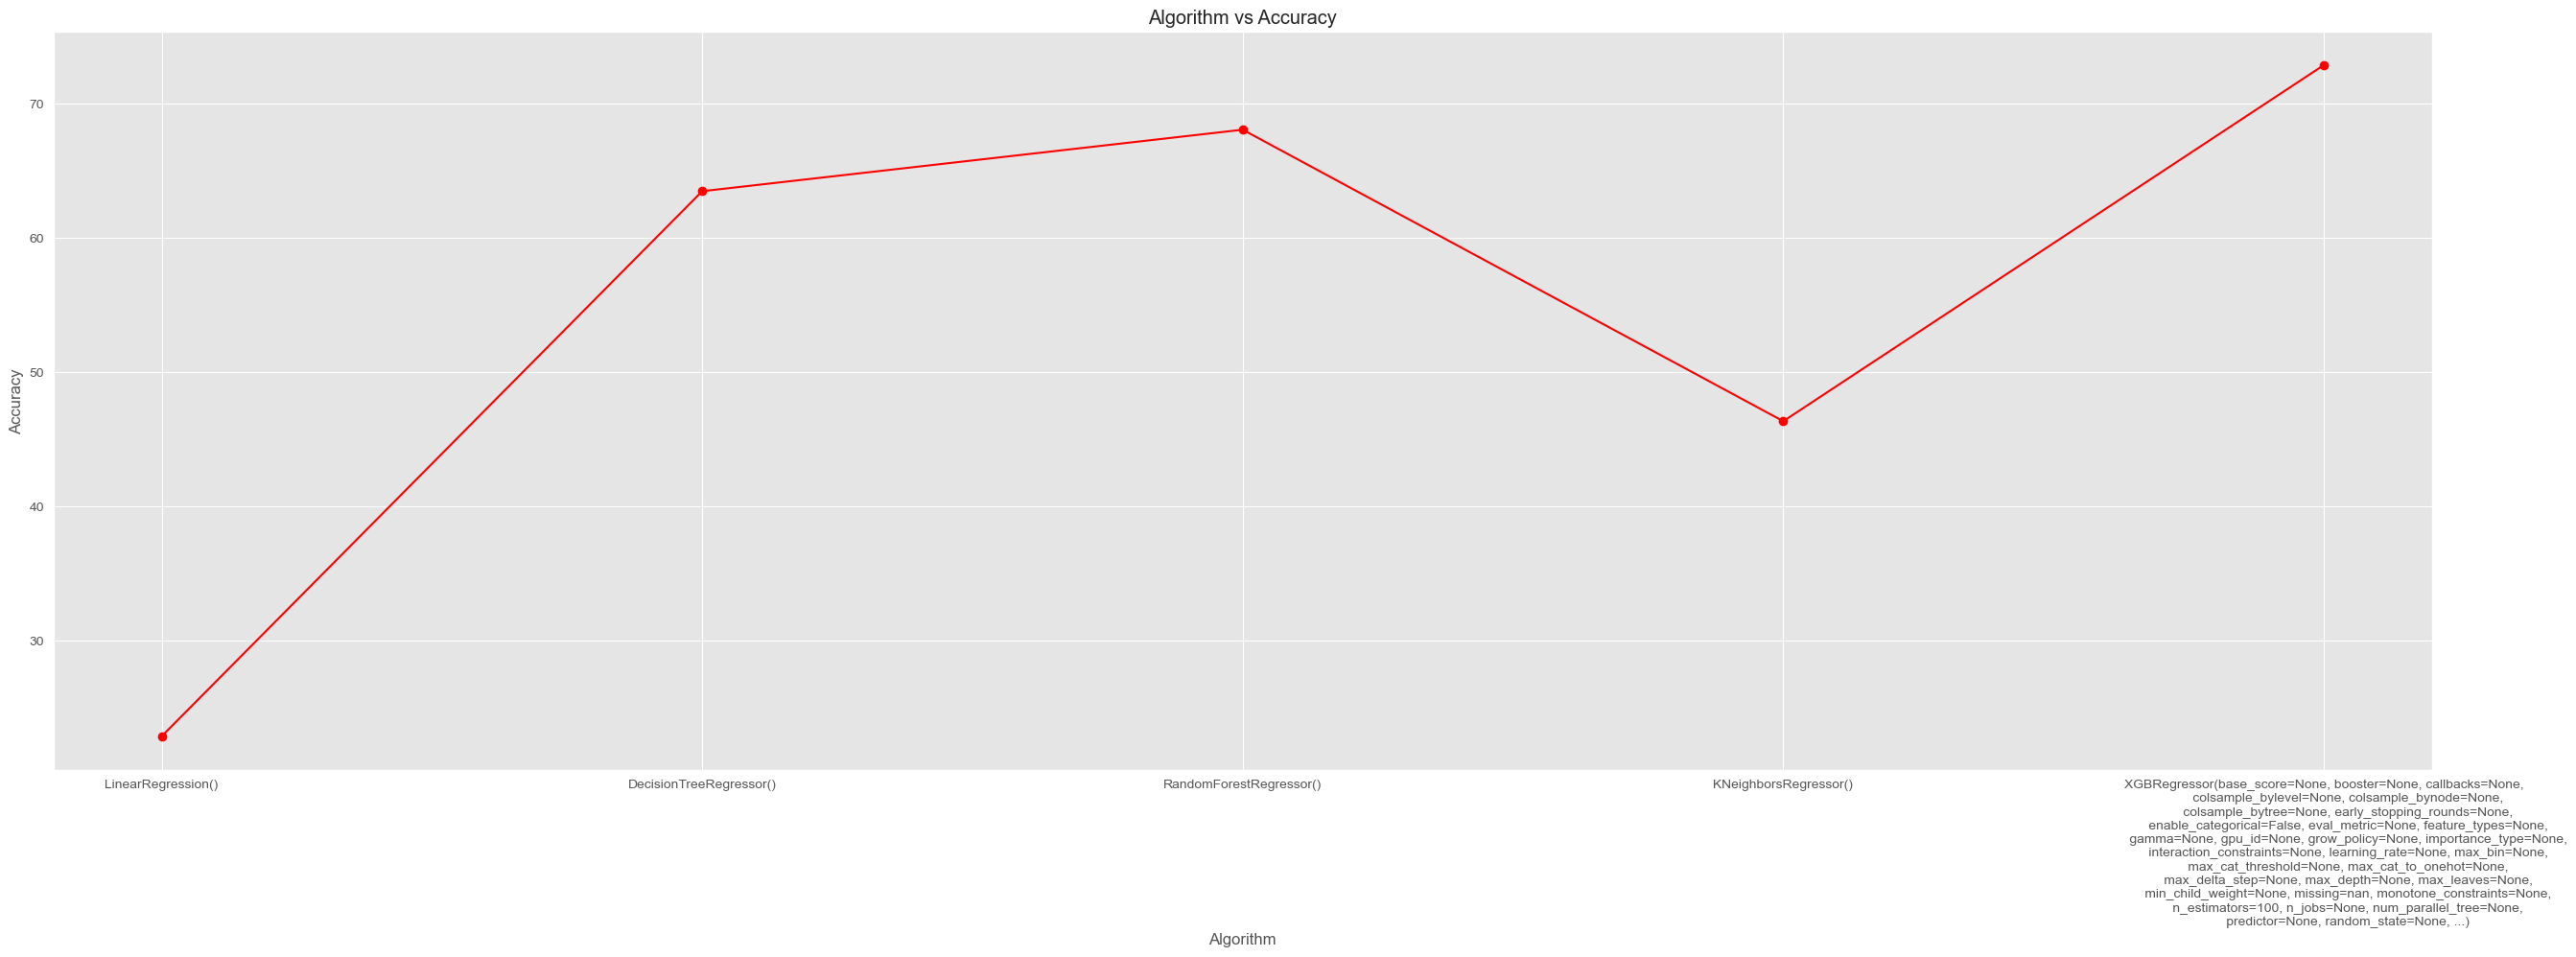

In [90]:
# make graph about Accuracy after normalization
 
plt.figure(figsize=(32, 10))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(dis.keys(),dis.values(),marker='o',color='red')
plt.show()

**Note**: So , the best model XGB Regressor Model around 70 %

### Export the Best Model & Label Encoder

In [91]:
import pickle
with open('finalize_model.pickle','wb') as f:
    pickle.dump(XGB,f)

In [92]:
# Save the label encoder to a file
with open('label_encoder.pickle','wb') as f:
    pickle.dump(LE,f)

### Load the Model & Label Encoder

In [93]:
# Load the label encoder from the file
with open('label_encoder.pickle', 'rb') as f:
    le = pickle.load(f)

In [94]:
# Load the XBG model from the file
with open('finalize_model.pickle', 'rb') as f:
    model = pickle.load(f)

## Inference

In [98]:
data

,Price,Baths,Land size,Beds,House size,Location,Lat,Lon,seller_type
0,5400000.0,1.0,500.0,3.0,16000.0,111,80.500000,6.166670,0
1,16800000.0,3.0,80.0,3.0,14800.0,11,79.989929,6.877246,1
2,20000000.0,2.0,200.0,3.0,28000.0,94,79.914926,6.951178,0
3,187000000.0,5.0,220.0,5.0,40000.0,37,80.016670,6.866670,1
4,1300000.0,1.0,63.0,2.0,9000.0,44,79.880242,6.838232,0
...,...,...,...,...,...,...,...,...,...
15322,6750000.0,1.0,150.0,3.0,12000.0,131,80.095663,7.143816,1
15323,70000000.0,2.0,70.0,3.0,11000.0,44,79.880242,6.838232,0
15324,44000000.0,4.0,200.0,5.0,27500.0,106,79.923272,6.851146,1
15325,15000000.0,2.0,50.0,2.0,13500.0,44,79.880242,6.838232,0


In [95]:
def predict_price(baths, beds, location, house_size=2.831365e+04, land_size=215.642461, lat=79.979304, lon=6.908008, seller_type=1):
    ar = np.ones(8)
    ar[0] = baths
    ar[1] = land_size
    ar[2] = beds
    ar[3] = house_size
    ar[4] = le.transform([location])
    ar[5] = lat
    ar[6] = lon
    ar[7] = seller_type
    return model.predict([ar])

In [100]:
predict_price(location=' Matara City,  Matara', baths=2, beds=3, house_size=2000)

array([1.8867994e+08], dtype=float32)